In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d umangjpatel/ham10000-imagenet-style-dataset

100% 2.58G/2.58G [02:17<00:00, 21.3MB/s]
100% 2.58G/2.58G [02:17<00:00, 20.1MB/s]


In [8]:
! unzip ham10000-imagenet-style-dataset.zip -d ham10000

Streaming output truncated to the last 5000 lines.
  inflating: ham10000/nv/ISIC_0026994.jpg  
  inflating: ham10000/nv/ISIC_0026997.jpg  
  inflating: ham10000/nv/ISIC_0026998.jpg  
  inflating: ham10000/nv/ISIC_0026999.jpg  
  inflating: ham10000/nv/ISIC_0027000.jpg  
  inflating: ham10000/nv/ISIC_0027001.jpg  
  inflating: ham10000/nv/ISIC_0027002.jpg  
  inflating: ham10000/nv/ISIC_0027003.jpg  
  inflating: ham10000/nv/ISIC_0027005.jpg  
  inflating: ham10000/nv/ISIC_0027007.jpg  
  inflating: ham10000/nv/ISIC_0027009.jpg  
  inflating: ham10000/nv/ISIC_0027010.jpg  
  inflating: ham10000/nv/ISIC_0027011.jpg  
  inflating: ham10000/nv/ISIC_0027012.jpg  
  inflating: ham10000/nv/ISIC_0027013.jpg  
  inflating: ham10000/nv/ISIC_0027014.jpg  
  inflating: ham10000/nv/ISIC_0027015.jpg  
  inflating: ham10000/nv/ISIC_0027016.jpg  
  inflating: ham10000/nv/ISIC_0027019.jpg  
  inflating: ham10000/nv/ISIC_0027020.jpg  
  inflating: ham10000/nv/ISIC_0027022.jpg  
  inflating: ham10000/nv/

In [9]:
import shutil
import os
import numpy as np

In [10]:
shutil.rmtree("/content/ham10000/nv", ignore_errors=False, onerror=None)
shutil.rmtree("/content/ham10000/akiec", ignore_errors=False, onerror=None)
shutil.rmtree("/content/ham10000/mel", ignore_errors=False, onerror=None)
shutil.rmtree("/content/ham10000/vasc", ignore_errors=False, onerror=None)

In [11]:
! find "/content/ham10000/bcc" -type f | wc -l


514


In [12]:
! find "/content/ham10000/bkl" -type f | wc -l


1099


In [13]:
! find "/content/ham10000/df" -type f | wc -l


115


In [14]:
import albumentations as A
import cv2
from matplotlib.image import imread
from matplotlib import pyplot as plt

transform = A.Compose([
    A.RandomCrop(width = 250, height = 350),
    A.RandomScale(scale_limit = 0.5),
    A.RandomBrightnessContrast(p =0.8),
    A.HorizontalFlip(p = 0.8),
    A.VerticalFlip(p = 0.8)
])

In [15]:
BCC_Images = os.listdir('/content/ham10000/bcc')
BKL_Images = os.listdir('/content/ham10000/bkl')
DF_Images = os.listdir('/content/ham10000/df')

transformed_BCC_Images = []
for Image_path in BCC_Images:
    read_image = imread("/content/ham10000/bcc/" + Image_path)
    for _ in range(1):
        transformed = transform(image=read_image)
        transformed_image = cv2.resize(transformed["image"], (64,64))
        transformed_BCC_Images.append(transformed_image)
    read_image = cv2.resize(read_image, (64,64))
    transformed_BCC_Images.append(read_image)


transformed_BKL_Images = []
for Image_path in BKL_Images:
    read_image = imread("/content/ham10000/bkl/" + Image_path)
    for _ in range(0):
        transformed = transform(image=read_image)
        transformed_image = cv2.resize(transformed["image"], (64,64))
        transformed_BKL_Images.append(transformed_image)
    read_image = cv2.resize(read_image, (64,64))
    transformed_BKL_Images.append(read_image)

transformed_DF_Images = []
for Image_path in DF_Images:
    read_image = imread("/content/ham10000/df/" + Image_path)
    for _ in range(9):
        transformed = transform(image=read_image)
        transformed_image = cv2.resize(transformed["image"], (64,64))
        transformed_DF_Images.append(transformed_image)
    read_image = cv2.resize(read_image, (64,64))
    transformed_DF_Images.append(read_image)

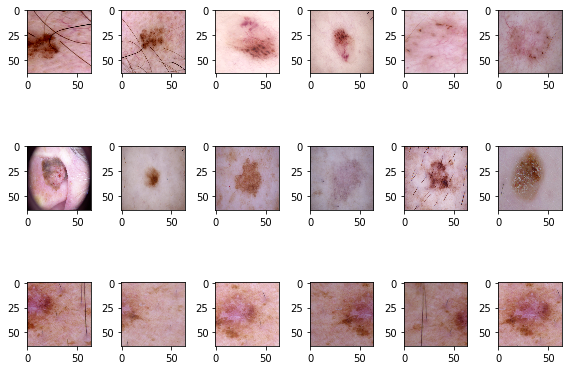

In [16]:
plt.figure(figsize=(8, 6))
cnt = 1
for img in transformed_BCC_Images:
    plt.subplot(3, 6, cnt)
    plt.imshow(img)
    cnt += 1
    if cnt == 7:
        break
for img in transformed_BKL_Images:
    plt.subplot(3, 6, cnt)
    plt.imshow(img)
    cnt += 1
    if cnt == 13:
        break
for img in transformed_DF_Images:
    plt.subplot(3, 6, cnt)
    plt.imshow(img)
    cnt += 1
    if cnt == 19:
        break
plt.tight_layout()
plt.show()

# Building Model

In [22]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical


base_model = VGG19(input_shape=(64,64,3), weights='imagenet', include_top=False, pooling = max)
model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(3,kernel_initializer='he_uniform'))
model.add(Activation('softmax'))

optimizer = optimizers.Adam(learning_rate=0.01,epsilon = 1e-7)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 dropout_1 (Dropout)         (None, 2, 2, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 3)                 6147      
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                      

In [ ]:
os.mkdir("/content/ham10000-imagenet-style-dataset-transformed") 
os.mkdir("/content/ham10000-imagenet-style-dataset-transformed/bcc") 
os.chdir("/content/ham10000-imagenet-style-dataset-transformed/bcc")
i = 0
for Image in transformed_BCC_Images:
    cv2.imwrite("bcc"+str(i)+".jpg", Image)
    i += 1

os.mkdir("/content/ham10000-imagenet-style-dataset-transformed/bkl") 
os.chdir("/content/ham10000-imagenet-style-dataset-transformed/bkl")
i = 0
for Image in transformed_BKL_Images:
    cv2.imwrite("bkl"+str(i)+".jpg", Image)
    i += 1

os.mkdir("/content/ham10000-imagenet-style-dataset-transformed/df") 
os.chdir("/content/ham10000-imagenet-style-dataset-transformed/df")
i = 0
for Image in transformed_DF_Images:
    cv2.imwrite("df"+str(i)+".jpg", Image)
    i += 1

In [42]:
image_generator = ImageDataGenerator(validation_split=0.2)    

train = image_generator.flow_from_directory(batch_size=50,
                                                 directory='/content/ham10000-imagenet-style-dataset-transformed',
                                                 shuffle=True,
                                                 subset="training",
                                                 target_size=(64, 64), 
                                                 class_mode='categorical',
                                                 classes = ["bcc", "bkl", "df"])

valid = image_generator.flow_from_directory(batch_size=50,
                                                 directory='/content/ham10000-imagenet-style-dataset-transformed',
                                                 shuffle=True,
                                                 subset="validation",
                                                 target_size=(64, 64), 
                                                 class_mode='categorical',
                                                 classes = ["bcc", "bkl", "df"])


Found 2623 images belonging to 3 classes.
Found 654 images belonging to 3 classes.


In [24]:
history = model.fit(
        train,
        validation_data=valid,
        epochs = 50,
        verbose=1)

Epoch 1/50
11/11 [==============================] - 6s 399ms/step - loss: 1.0271 - accuracy: 0.5398 - val_loss: 2.9958 - val_accuracy: 0.5459
Epoch 2/50
11/11 [==============================] - 4s 373ms/step - loss: 0.7087 - accuracy: 0.6984 - val_loss: 5.9043 - val_accuracy: 0.4159
Epoch 3/50
11/11 [==============================] - 4s 379ms/step - loss: 0.6276 - accuracy: 0.7358 - val_loss: 2.3500 - val_accuracy: 0.5688
Epoch 4/50
11/11 [==============================] - 4s 384ms/step - loss: 0.5115 - accuracy: 0.7899 - val_loss: 2.5838 - val_accuracy: 0.5306
Epoch 5/50
11/11 [==============================] - 4s 417ms/step - loss: 0.5547 - accuracy: 0.7705 - val_loss: 1.0914 - val_accuracy: 0.6865
Epoch 6/50
11/11 [==============================] - 4s 396ms/step - loss: 0.4448 - accuracy: 0.8204 - val_loss: 2.2840 - val_accuracy: 0.4893
Epoch 7/50
11/11 [==============================] - 4s 384ms/step - loss: 0.4236 - accuracy: 0.8311 - val_loss: 1.1175 - val_accuracy: 0.5994
Epoch 

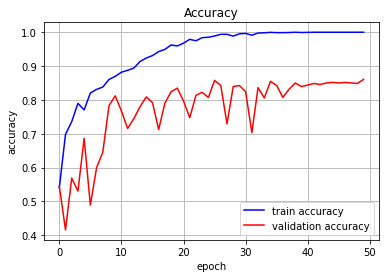

In [25]:
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'b', label='train accuracy')
plt.plot(history.history['val_accuracy'],'r', label='validation accuracy')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()
# Plot the Loss Curves

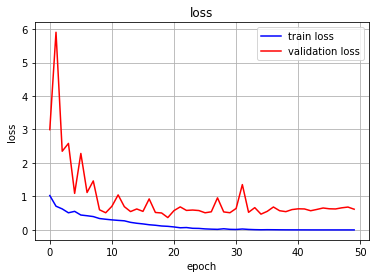

In [26]:
fig = plt.figure()
plt.plot(history.history['loss'],'b', label='train loss')
plt.plot(history.history['val_loss'],'r', label='validation loss')
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

In [92]:
shutil.rmtree("/content/ham10000-imagenet-style-dataset-transformed", ignore_errors=False, onerror=None)

In [44]:
y_test = np.vstack([valid[0][1], valid[1][1], valid[2][1]]) 
y_pred = model.predict(valid)

3/3 [==============================] - 0s 143ms/step


In [45]:
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=["bcc", "bkl", "df"]))

              precision    recall  f1-score   support

         bcc       0.80      0.80      0.80       205
         bkl       0.91      0.96      0.94       219
          df       0.87      0.82      0.84       230

    accuracy                           0.86       654
   macro avg       0.86      0.86      0.86       654
weighted avg       0.86      0.86      0.86       654

